(correlation)=
# Regression


```{admonition} Important Readings
:class: seealso
- {cite}`freedman2007statistics`, Chapters 10, 11, 12
```

## Regression Line

Suppose we wanted to predict a variable $y$. We could just guess the average $y$ value. This can be improved upon by incorporating information from a related variable $x$. The regression line does that. It is the trend line through a scatter diagram of $x$ vs $y$. The line estimates the average value of $y$ corresponding to each possible $x$. We sometimes call this **simple linear regression** to emphasize that we are predicting $y$ from a single variable $x$. Though not in our textbook, the notation $\hat{y}$ (read as "y hat") is often used for the predicted $y$ value. 

Use the interactive graph below, dragging the points around, to see how the regression line fits the data. 

In [1]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, PointDrawTool, CustomJS, Div, HoverTool, Line
from bokeh.layouts import column
from IPython.display import HTML

# Display plot within a notebook
output_notebook(hide_banner=True)

# Sample data
data = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 3, 4, 5]}

# Helper function to calculate initial statistics
def calculate_initial_statistics(data):
    x = data['x']
    y = data['y']
    n = len(x)
    if n == 0:  # Avoid division by zero if there are no data points
        return 0, 0, 0, 0, 0
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    slope = (sum(x[i]*y[i] for i in range(n)) - n*mean_x*mean_y) / (sum(x[i]**2 for i in range(n)) - n*mean_x**2)
    intercept = mean_y - slope*mean_x
    sdx = (sum((xi - mean_x) ** 2 for xi in x) / n) ** 0.5
    sdy = (sum((yi - mean_y) ** 2 for yi in y) / n) ** 0.5
    r = (sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n)) / n) / (sdx * sdy)
    return slope, intercept, sdx, sdy, r

# Calculate initial statistics
slope, intercept, sdx, sdy, r = calculate_initial_statistics(data)

# Create ColumnDataSource for data and regression line
source = ColumnDataSource(data)
line_source = ColumnDataSource(data={'x': [min(data['x']), max(data['x'])], 'y': [slope * min(data['x']) + intercept, slope * max(data['x']) + intercept]})

# Create a figure
width = 450
height = width
p = figure(x_range=(0, 6), y_range=(0, 6), tools="save", height=height, width=width)

# Add circle glyph for data points, shade of blue
c1 = p.circle('x', 'y', source=source, size=20, color="deepskyblue", alpha=0.5)

# Add line glyph for regression line, visible from the start
line = p.line('x', 'y', source=line_source, line_width=3, color="black", alpha=0.7)

# Display for regression details with initial values
div = Div(text=f"Slope: {slope:.4f}<br>Intercept: {intercept:.4f}<br>SD of X: {sdx:.4f}<br>SD of Y: {sdy:.4f}<br>Correlation Coefficient: {r:.4f}", width=400, height=100)

# CustomJS for updating the regression details dynamically
callback = CustomJS(args=dict(source=source, line_source=line_source, div=div), code="""
    const data = source.data;
    const x = data['x'];
    const y = data['y'];
    const n = x.length;

    if (n === 0) {
        line_source.data = {'x': [], 'y': []};
        div.text = "Slope: N/A<br>Intercept: N/A<br>SD of X: N/A<br>SD of Y: N/A<br>Correlation Coefficient: N/A";
        return;
    }

    let sum_x = 0, sum_y = 0, sum_xy = 0, sum_xx = 0, sum_yy = 0;
    for (let i = 0; i < n; i++) {
        sum_x += x[i];
        sum_y += y[i];
        sum_xy += x[i] * y[i];
        sum_xx += x[i] * x[i];
        sum_yy += y[i] * y[i];
    }

    const mean_x = sum_x / n;
    const mean_y = sum_y / n;
    const slope = (sum_xy - n * mean_x * mean_y) / (sum_xx - n * mean_x * mean_x);
    const intercept = mean_y - slope * mean_x;
    const sdx = Math.sqrt(sum_xx / n - mean_x * mean_x);
    const sdy = Math.sqrt(sum_yy / n - mean_y * mean_y);
    const r = (sum_xy - n * mean_x * mean_y) / (Math.sqrt((sum_xx - n * mean_x * mean_x) * (sum_yy - n * mean_y * mean_y)));

    const reg_x = [Math.min(...x), Math.max(...x)];
    const reg_y = reg_x.map(x => slope * x + intercept);

    line_source.data = {'x': reg_x, 'y': reg_y};
    line_source.change.emit();

    div.text = "Slope: " + slope.toFixed(4) + "<br>Intercept: " + intercept.toFixed(4) +
               "<br>SD of X: " + sdx.toFixed(4) + "<br>SD of Y: " + sdy.toFixed(4) +
               "<br>Correlation Coefficient: " + r.toFixed(4);
""")

# Attach the callback to the source for updating regression
source.js_on_change('data', callback)

# Add PointDrawTool and HoverTool to the figure
tool = PointDrawTool(renderers=[c1], add=True)
p.add_tools(tool)
p.toolbar.active_tap = tool
hover = HoverTool(renderers=[c1], tooltips=[("X", "@x"), ("Y", "@y")])
p.add_tools(hover)

# Show plot
style = """
<style>
.output {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""
display(HTML(style))
show(column(div, p))


### The Slope

Conceptually, the regression line is distinct from a correlation coefficient because the slope conveys an *effect size*. If the slope is 2, we are saying that increasing $x$ by 1 unit predicts a 2-unit increase in $y$. 

The slope is directly related to the correlation coefficient, $r$. For each SD increase in $x$, there is an average increase of $r$ SDs in $y$. The regression slope converts this from standard units back into natural units, 

$$ \text{slope} = r \frac{\text{SD}_y}{\text{SD}_x}.$$

```{figure} images/rawStandardizedCorr.svg
:width: 77%
:name: rawStandardizedCorr

The regression slope and $r$ are the same if the data is in standard units.
```

**Example** Suppose, for a collection of foods, the correlation between protein and calories per 100 grams is $r = 0.4$. A particular food is 2 SDs above the average in calories. Predict how many SDs above average it is in protein per 100 grams. 

```{dropdown} Protein

The food will be $2 \times r = 0.8$ SDs above the average in protein. 

```

**Example** Suppose, for a collection of foods, the correlation between protein and calories per 100 grams is $r = 0.4$. The average food has 180 calories and 12 grams of protein. The SDs are 60 and 4 for calories and protein, respectively. A particular food has 60 calories. Predict how many grams of protein it has. 

```{dropdown} Calories

The food is two SDs below the average in calories. It will be $2\times r = 0.8$ SDs below average in protein. The prediction is $12 - (.8\times 4) = 8.8$ grams of protein. 

```

### Linearity

Any trustworthy regression is built on the assumption that $x$ and $y$ are linearly related. Which of these scenario are suited to regression analysis predicting wage in dollars from job tenure in months at a factory? 

1. All employees are first hired at a wage of \$20 per hour. Then at, at six months intervals, everyone receives a raise which averages \$1 per hour. 

2. All employees are first hired at a wage of \$20 per hour. Then at, at six months intervals, everyone receives a raise which averages an additional 10\% per hour. 

3. All employees are first hired at a wage of \$20 per hour. Everyone receives an average \$1 per hour raise after their two years. The next raise is also \$1 per hour, but it arrives after the next year. The next raise is also \$1 per hour, but it arrives after the next six months...

```{dropdown} Linearity

Only the first example could be interpreted as a linear relationship between tenure and wage. 

```

### Finding the Regression Line

The regression line is given by an equation $\hat{y} = mx + b$. The slope is $m$. The intercept, $b$, can be interpreted as the predicted value of $y$ if $x=0$. The intercept is found by realizing that an average $x$ value predicts an average $y$ value. Armed with a slope and a point on the line, finding the intercept is a matter of algebra. 


```{figure} images/FatherSonPanel3.svg
:width: 77%
:name: FatherSonPanel3

The best fit is found when the regression line passes throught the point of averages.
```



The general recipe to find the line is:

1. The slope is $m = r \times \frac{\text{SD}_y}{\text{SD}_x}.$
2. Now find $b$, the intercept.
   - The point ($\text{Average}_x, \text{Average}_y$) is on the line.
   - Plug that into $y = r \frac{\text{SD}_y}{\text{SD}_x} x + b$.
   - Solve, $b = \text{Average}_y - r \frac{\text{SD}_y}{\text{SD}_x} \text{Average}_x $.
3. The regression line is then $\hat{y} = mx + b.$ 

  


## Residuals (Errors)

The regression line provides an average prediction. For any data point, there is a prediction error (also called a residual). This is calculated 

$$\text{Prediction Error} = \text{Actual Value - Predicted Value}.$$

Here, the order matters. Positive prediction errors correspond to underestimations. Negative prediction errors arise when the predicted value is higher than the actual value. Above and below the regression line, we find positive and negative errors, respectively. 

Below, we are predicting protein content from calories. The prediction line happens to separate animal protein sources from mostly vegan foods.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models import TabPanel, Tabs


# Load data
url = 'https://raw.githubusercontent.com/alexanderthclark/Stats1101/main/Data/Nutrition/nutritional_info.csv'
df_all = pd.read_csv(url)


def make_plot(drop=False):
    df = df_all[~df_all['Food Item'].str.contains("Almond")].copy()

    if drop:
        df = df[~df['Food Item'].str.contains("utty")]
    
    # Adjusting for the flip: now y is 'Protein (g per 100g)' and x is 'Calories (per 100g)'
    X = df[['Calories (per 100g)']].values.reshape(-1, 1)  # Independent variable
    y = df['Protein (g per 100g)']  # Dependent variable

    # Linear regression
    model = LinearRegression().fit(X, y)
    df['Predicted'] = model.predict(X)
    df['Residual'] = y - df['Predicted']


    # Prepare data for Bokeh
    source = ColumnDataSource(data={
        'x': df['Calories (per 100g)'],  # This now represents the x-axis values
        'y': df['Protein (g per 100g)'],  # This now represents the y-axis values
        'food': df['Food Item'],
        'predicted': df['Predicted'],
        'residual': df['Residual']
    })

    # Bokeh plot setup with flipped axes
    plot = figure(x_range=(0,600), y_range=(-1,34),
                  width=450, height=600, title="Protein vs Calories",
                  x_axis_label="Calories (per 100g)", y_axis_label="Protein (g per 100g)",
                  tools="pan,wheel_zoom,box_zoom,reset,save")

    # Scatter plot
    if drop:
        color = 'black'
    else:
        color = 'royalblue'
    plot.circle('x', 'y', size=10, source=source, color=color)

    # Regression line
    x_range = np.linspace(df['Calories (per 100g)'].min(), df['Calories (per 100g)'].max(), 100)
    plot.line(x_range, model.coef_[0] * x_range + model.intercept_, color='red')

    # Hover tool for displaying food item name and residual
    hover = HoverTool()
    hover.tooltips = [
        ("Food", "@food"),
        ("Residual", "@residual{0.00}")
    ]
    plot.add_tools(hover)
    
    return plot

# Show plot
output_notebook(hide_banner = True)

all_data = make_plot()
drops = make_plot(drop = True)

tab1 = TabPanel(child=all_data, title="All Data")
tab2 = TabPanel(child=drops, title="Drop Nutty Buddy")


show(Tabs(tabs=[tab1, tab2]))


### Outliers

Outliers are not emphasized in {cite}`freedman2007statistics`, but you might already apply the term to any data point that singly defies the trend in the rest of the data. In the data above, you might argue that the Little Debbie Nutty Buddy is an outlier. The slope would be greater and the regression line would better fit the data if we could drop the Nutty Buddy. 

Should you drop the Nutty Buddy observation? We can live with "maybe." It will eventually come down to whether or not Nutty Buddies are relevant for your purposes. If you care only about the relationship between calories and protein in unprocessed foods, it is prudent to drop the Nutty Buddy. If you care about the diet of someone who knows and enjoys such gustatory treasures, include the Nutty Buddy. If want to study a standard American diet, you should really add more proccessed foods to the data. 

## Evaluating the Regression Line

A regression performs well if the predictions are accurate. This is a property of the residuals. If residuals are typically close to zero, then the regression is good. We can't look at the average residual-the average residual will always be zero (for the residuals calculated from the data used to find the regression line). This is no different than how we had to summarize deviations from an average when covering standard deviation. Similarly, we turn to a root mean square calculation. 

We summarize the typical residual by calculating the **root mean square error** (rms error or RMSE). This is the root mean square size of a list, applied to the list of residuals. 


$$\text{root mean square error} = \sqrt{\frac{1}{n}\sum_{i=1}^n \text{residual}_i^2}.$$

It turns out, this is equal to $\sqrt{1-r^2} \times \text{SD}_y$. Why does it make more sense that $\text{SD}_y$ appears in the formula instead of $\text{SD}_x?$

```{dropdown} root mean square error

Units. Residuals are vertical distances, measured in $y$ units.
```

Notice, because rms error = $\sqrt{1-r^2} \times \text{SD}_y$, then the rms error is less than or equal to $\text{SD}_y$. In words, we can better predict $y$ using $x$ and $y$ than by using $y$ alone (constructing a regression line or an average, respectively).

### The residual plot 

A **residual plot** is constructed as a scatter diagram of the $x$ values and the residual. The specific pairs are $(x, y - \hat{y})$. If the residual plot shows a trend, like increasing spread or something nonlinear, that's a sign a linear regression might not work well. 

```{figure} images/FatherSonResidual.svg
:width: 77%
:name: FatherSonResidual

The diagram on the left related $x$ and $y$. The residual plot on the right shows no systematic pattern between $x$ and the residuals. 
```

## Exercises

```{exercise-start}
:label: assortMating
```

We want to study assortative mating among couples. Specifically, if partner *A* makes a lot of money, does partner *B* also make a lot?

1. Are you more interested in correlation or a regression slope? Explain your choice.
2. What would a correctly structured data set look like? What are the variables? Discuss at least one ambiguity related to the construction of $x$ and $y$ variables.

```{exercise-end}
```

```{exercise-start}
:label: residualFur
```

Predicting how much someone spends on expensive fur coats based on their income is easy for low income levels and difficult at high income levels. Imagine you ran a regression predicting spending on fur coats from income. Sketch a plausible residual plot. 

```{exercise-end}
```

## Python

Below is a complete regression analysis in Python.

The scatter plot demonstrates a linear trend between quantitative variables. The residual plot also demonstrates equal variance or homoscedasticity. We can be confident that linear regression is appropriate for this data. 

Regression line:

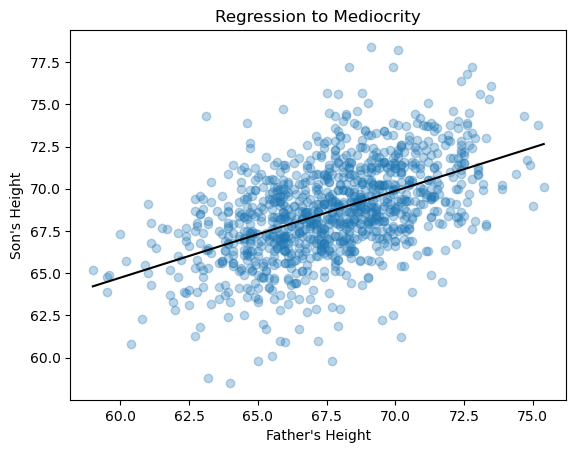

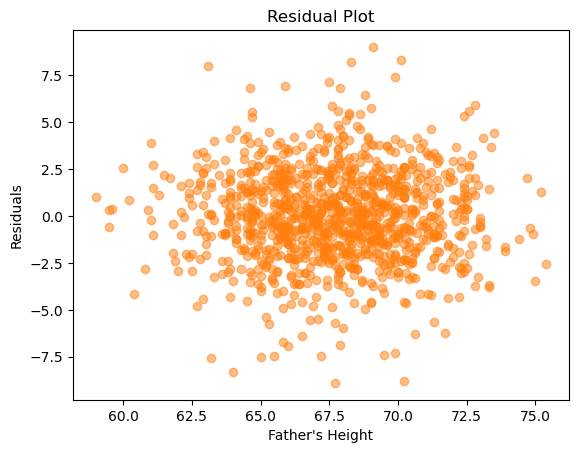

In [3]:
#!pip install --upgrade statwrap
import statwrap
from IPython.display import display, Markdown as md
%use_all

url = 'https://raw.githubusercontent.com/alexanderthclark/Stats1101/main/Data/FatherSonHeights/pearson.csv'
# load a DataFrame
df = pd.read_csv(url)

# Set independent and dependent variables
y = df['Son'] # Son's heights
x = df['Father'] # Father's heights

# Run regression
reg = linest(y, x)

# Show regression line equation in output below
display(md('Regression line:'), reg)

# Plot data and regression line
reg.plot(xlabel = 'Father\'s Height',
         ylabel = "Son's Height",
         title = 'Regression to Mediocrity')


# Make residual plot
scatter_plot(x, reg.residuals,
            xlabel = "Father's Height",
            ylabel = 'Residuals',
            title = 'Residual Plot',
            color = 'C1')